In [1]:
import pandas as pd

df = pd.read_pickle('dataset/purprd_cust.pkl')
cust = pd.read_pickle('dataset/기준고객list.pkl')
df

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,구매월,중분류명,소분류명,대분류명,성별,거주지역,연령대
0,A,2757986,15148,10,20140920,20,1000,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
1,A,2757986,15148,10,20140920,20,4100,9,가공식품,일반가공식품,가공식품,F,경기 김포시,50대
2,A,2757987,400,10,20140920,12,5000,9,농산물,채소,신선식품,F,경기 김포시,60세이상
3,A,2757987,400,10,20140920,12,10200,9,젓갈/반찬,벌크김치,가공식품,F,경기 김포시,60세이상
4,A,2757988,2043,10,20140920,13,3950,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,D,253839,15835,40,20151026,13,3000,22,음료,일반차음료,가공식품,M,경기 김포시,30대
28593026,D,253839,15835,40,20151026,13,1300,22,음료,커피음료,가공식품,M,경기 김포시,30대
28593027,D,253840,2070,40,20151026,16,59700,22,헤어케어,샴푸,일상용품,M,울산 동구,50대
28593028,D,253841,15835,40,20151026,23,2000,22,과자,하드캔디,가공식품,M,경기 김포시,30대


In [35]:
test = df.groupby('고객번호')[['구매금액']].sum()

In [34]:
test

고객번호
1        85042550
2        99880760
3         3165167
4        16693810
5        13237070
           ...   
19379     5779280
19380     3912977
19381     6040669
19382     4401773
19383     2384400
Name: 구매금액, Length: 19383, dtype: int64

In [52]:
(test/1000000).describe()

,구매금액
count,19383.000000
mean,34.928502
std,64.353738
min,0.015490
25%,10.932416
50%,17.176238
75%,39.356354
max,3571.831616


<AxesSubplot:>

C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current f

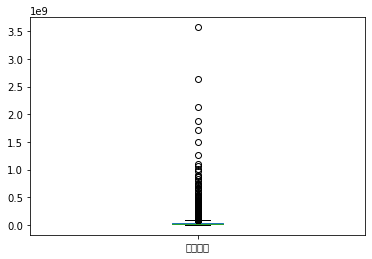

In [31]:
df.groupby('고객번호')['구매금액'].sum()

<AxesSubplot:>

C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current f

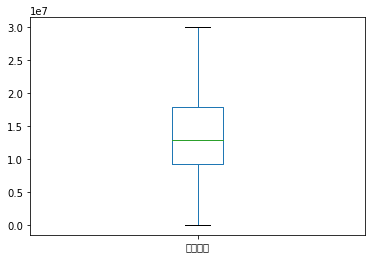

In [154]:
test[(test['구매금액']<30000000)].plot(kind='box')

In [153]:
len(test[(test['구매금액']>150000000)])

493

구매액 3천만원 미만 고객들. 

In [2]:
test_df = df.set_index('고객번호')

In [3]:
test_df = test_df.loc[cust]

In [4]:
test_df.reset_index(inplace=True)

In [5]:
def year(x):
    x = str(x)
    return x[:4]

def month(x):
    x = str(x)
    return x[4:6]

test_df['year'] = test_df['구매일자'].apply(year)
test_df['month'] = test_df['구매일자'].apply(month)

In [7]:
test_df

,고객번호,제휴사,영수증번호,점포코드,구매일자,구매시간,구매금액,구매월,중분류명,소분류명,대분류명,성별,거주지역,연령대,year,month
0,15148,A,2757986,10,20140920,20,1000,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대,2014,09
1,15148,A,2757986,10,20140920,20,4100,9,가공식품,일반가공식품,가공식품,F,경기 김포시,50대,2014,09
2,15148,A,2425862,10,20140726,19,10000,7,차/커피,디저트류,가공식품,F,경기 김포시,50대,2014,07
3,15148,A,1151596,10,20140103,18,10000,1,차/커피,디저트류,가공식품,F,경기 김포시,50대,2014,01
4,15148,A,1151603,10,20140103,13,51000,1,가공식품,식당가 중식,가공식품,F,경기 김포시,50대,2014,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28445978,14153,C,925569,58,20150120,16,10000,13,잡곡,현미,신선식품,F,전라남도 영광,50대,2015,01
28445979,14153,C,925569,58,20150120,16,4990,13,계란류,일반계란,신선식품,F,전라남도 영광,50대,2015,01
28445980,14153,C,925579,58,20150121,16,4900,13,양채류,양배추,신선식품,F,전라남도 영광,50대,2015,01
28445981,14153,C,925579,58,20150121,16,2300,13,우유,일반우유,가공식품,F,전라남도 영광,50대,2015,01


In [160]:
test_df[(test_df['고객번호'])==17159].groupby('대분류명')['구매금액'].sum().sort_values(ascending=False)

대분류명
신선식품        9098120
의류           671600
패션잡화         669200
가공식품         347850
명품            84800
전문스포츠/레저      79000
가구/인테리어       54300
일상용품          37850
Name: 구매금액, dtype: int64

In [6]:
## 고객 기준 산정

test_df.groupby('고객번호')[['구매금액']].sum()

,구매금액
고객번호,
1,85042550
2,99880760
3,3165167
4,16693810
5,13237070
...,...
19356,6245805
19357,8664915
19359,3259137


In [7]:
test_df['month'] = test_df['month'].astype('int64')

In [13]:
# 반기별 데이터 나누기

df_1 = test_df[(test_df['year']=='2014') & (test_df['month']<=6)]
df_2 = test_df[(test_df['year']=='2014') & (test_df['month']>6)]
df_3 = test_df[(test_df['year']=='2015') & (test_df['month']<=6)]
df_4 = test_df[(test_df['year']=='2015') & (test_df['month']>6)]

In [27]:
sort_df_1 = (df_1.groupby('고객번호')[['구매금액']].sum())/1000000

In [30]:
sort_df_1[sort_df_1['구매금액']>100].index

Int64Index([   39,    68,    97,   408,   529,   562,   947,  1880,  1907,
             2064,  2290,  2348,  2450,  2496,  2657,  3624,  3833,  3890,
             4067,  4525,  4659,  5584,  5956,  5965,  6012,  6128,  6207,
             6355,  7862,  7957,  8079,  8102,  8214,  8224,  8511,  8634,
             9272,  9406,  9518,  9776, 10487, 10859, 11678, 11763, 14323,
            15999, 17446, 17456],
           dtype='int64', name='고객번호')

In [53]:
half_sales = [df_1['구매금액'].sum(),df_2['구매금액'].sum(),df_3['구매금액'].sum(),df_4['구매금액'].sum()]
# [ df1_sales = df_1['구매금액'].sum(),df2_slaes = df_2['구매금액'].sum(),df3_sales = df_3['구매금액'].sum(), df4_sales = df_4['구매금액'].sum()]
hs_df = pd.DataFrame(half_sales,index=['14_1','14_2','15_1','15_2'], columns=['판매금액']).transpose()

hs_df['d1'] = (hs_df['14_2'] - hs_df['14_1'])
hs_df['d2'] = (hs_df['15_1'] - hs_df['14_2'])
hs_df['d3'] = (hs_df['15_2'] - hs_df['15_1'])
hs_df['d1_p'] = (hs_df['14_2'] - hs_df['14_1'])/hs_df['14_1']*100
hs_df['d2_p'] = (hs_df['15_1'] - hs_df['14_2'])/hs_df['14_2']*100
hs_df['d3_p'] = (hs_df['15_2'] - hs_df['15_1'])/hs_df['15_1']*100
hs_df

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p
판매금액,158052316094,170789239946,168169287667,175984504990,12736923852,-2619952279,7815217323,8.058676,-1.534027,4.647232


In [54]:
pv_1 = pd.pivot_table(data= df_1, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_2 = pd.pivot_table(data= df_2, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_3 = pd.pivot_table(data= df_3, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_4 = pd.pivot_table(data= df_4, columns='month', index='고객번호',values='구매금액',aggfunc='sum')

In [55]:
pv_1.fillna(0,inplace=True)
pv_2.fillna(0,inplace=True)
pv_3.fillna(0,inplace=True)
pv_4.fillna(0,inplace=True)

In [56]:
pv_4

month,7,8,9,10,11,12
고객번호,,,,,,
1,2965030.0,2366510.0,2475040.0,2931060.0,1152468.0,1212410.0
2,7844720.0,1375500.0,4622380.0,5027420.0,4469920.0,2503880.0
3,160880.0,95130.0,165007.0,98292.0,106109.0,53700.0
4,848232.0,453530.0,825350.0,546240.0,409235.0,654670.0
5,0.0,0.0,0.0,828910.0,906430.0,880920.0
...,...,...,...,...,...,...
19356,552360.0,411454.0,635000.0,184983.0,228470.0,422320.0
19357,373638.0,244033.0,483190.0,414941.0,287243.0,443630.0
19359,131920.0,339990.0,147690.0,105900.0,194500.0,172380.0


In [83]:
pv_1['sum'] = pv_1[1] + pv_1[2] + pv_1[3] + pv_1[4] + pv_1[5] + pv_1[6]
pv_2['sum'] = pv_2[7] + pv_2[8] + pv_2[9] + pv_2[10] + pv_2[11] + pv_2[12]
pv_3['sum'] = pv_3[1] + pv_3[2] + pv_3[3] + pv_3[4] + pv_3[5] + pv_3[6]
pv_4['sum'] = pv_4[7] + pv_4[8] + pv_4[9] + pv_4[10] + pv_4[11] + pv_4[12]

In [87]:
pv_1[['sum']]

month,sum
고객번호,
1,19925355.0
2,24323230.0
3,851215.0
4,5042106.0
5,5460150.0
...,...
19356,170160.0
19357,91950.0
19359,43190.0


In [177]:
A = pd.merge(pv_1[['sum']],pv_2[['sum']], on ='고객번호', how ='outer')
B = pd.merge(A, pv_3[['sum']], on = '고객번호', how='outer')
total = pd.merge(B, pv_4[['sum']], on = '고객번호', how='outer')

In [178]:
total.fillna(0, inplace=True)
total.columns = ['14_1','14_2','15_1','15_2']

In [179]:
total['d1'] = total['14_2'] - total['14_1']
total['d2'] = total['15_1'] - total['14_2']
total['d3'] = total['15_2'] - total['15_1']

total['d1_p'] = (total['14_2'] - total['14_1']) / total['14_1']
total['d2_p'] = (total['15_1'] - total['14_2']) / total['14_2']
total['d3_p'] = (total['15_2'] - total['15_1']) / total['15_1']

In [180]:
total['mean'] = (total['d1_p'] + total['d2_p'] + total['d3_p'])/3

In [181]:
total

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p,mean
고객번호,,,,,,,,,,,
1,19925355.0,34116312.0,17898365.0,13102518.0,14190957.0,-16217947.0,-4795847.0,0.712206,-0.475372,-0.267949,-0.010372
2,24323230.0,21922100.0,27791610.0,25843820.0,-2401130.0,5869510.0,-1947790.0,-0.098718,0.267744,-0.070086,0.032980
3,851215.0,1042554.0,592280.0,679118.0,191339.0,-450274.0,86838.0,0.224783,-0.431895,0.146616,-0.020165
4,5042106.0,4257510.0,3656937.0,3737257.0,-784596.0,-600573.0,80320.0,-0.155609,-0.141062,0.021964,-0.091569
5,5460150.0,2225730.0,2934930.0,2616260.0,-3234420.0,709200.0,-318670.0,-0.592368,0.318637,-0.108578,-0.127437
...,...,...,...,...,...,...,...,...,...,...,...
19356,170160.0,1536090.0,2104968.0,2434587.0,1365930.0,568878.0,329619.0,8.027327,0.370342,0.156591,2.851420
19357,91950.0,3281346.0,3044944.0,2246675.0,3189396.0,-236402.0,-798269.0,34.686199,-0.072044,-0.262162,11.450664
19359,43190.0,1286327.0,837240.0,1092380.0,1243137.0,-449087.0,255140.0,28.782982,-0.349124,0.304739,9.579533


In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

h_list = ['14_1','14_2','15_1','15_2']

for i in h_list:
    total[i] = scaler.fit_transform(total[[i]])

In [183]:
total['d1'] = total['14_2'] - total['14_1']
total['d2'] = total['15_1'] - total['14_2']
total['d3'] = total['15_2'] - total['15_1']

total['d1_p'] = (total['14_2'] - total['14_1']) / total['14_1']*100
total['d2_p'] = (total['15_1'] - total['14_2']) / total['14_2']*100
total['d3_p'] = (total['15_2'] - total['15_1']) / total['15_1']*100

total

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p,mean
고객번호,,,,,,,,,,,
1,0.014341,0.025508,0.017109,0.010494,0.011167,-0.008399,-0.006615,77.864845,-32.926031,-38.665670,-0.010372
2,0.017507,0.016390,0.026574,0.020704,-0.001117,0.010184,-0.005870,-6.381615,62.133554,-22.089643,0.032980
3,0.000609,0.000778,0.000553,0.000539,0.000169,-0.000225,-0.000014,27.712815,-28.944148,-2.578992,-0.020165
4,0.003626,0.003182,0.003485,0.002989,-0.000444,0.000303,-0.000496,-12.255258,9.516402,-14.221284,-0.091569
5,0.003927,0.001663,0.002794,0.002091,-0.002265,0.001131,-0.000703,-57.662429,68.037584,-25.165745,-0.127437
...,...,...,...,...,...,...,...,...,...,...,...
19356,0.000119,0.001147,0.002000,0.001945,0.001028,0.000853,-0.000055,864.709466,74.357355,-2.735298,2.851420
19357,0.000063,0.002452,0.002899,0.001795,0.002389,0.000447,-0.001105,3817.132210,18.238841,-38.097361,11.450664
19359,0.000027,0.000960,0.000787,0.000870,0.000933,-0.000173,0.000083,3392.822610,-18.027799,10.486999,9.579533


In [196]:
total['h1_d'] = total['15_1'] - total['14_1']
total['h2_d'] = total['15_2'] - total['14_2']

In [206]:
total['h1_d'].describe()

count    19085.000000
mean         0.002458
std          0.015076
min         -0.971575
25%          0.000217
50%          0.001076
75%          0.002718
max          0.588848
Name: h1_d, dtype: float64

In [191]:
print(len(total[(total['d1_p']<0)])/len(total))
print(len(total[(total['d2_p']<0)])/len(total))
print(len(total[(total['d3_p']<0)])/len(total))

print(len(total[(total['d1']<0)])/len(total))
print(len(total[(total['d2']<0)])/len(total))
print(len(total[(total['d3']<0)])/len(total))

0.3798270893371758
0.24474718365208278
0.6874508776526067
0.3798270893371758
0.24474718365208278
0.6874508776526067


<AxesSubplot:>

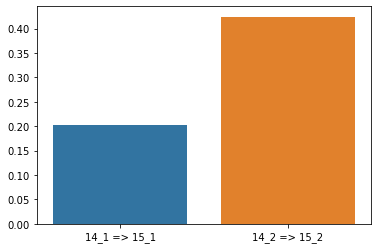

In [205]:
loss_h_list = [len(total[(total['h1_d']<0)])/len(total),len(total[(total['h2_d']<0)])/len(total)]

sns.barplot(x=['14_1 => 15_1', '14_2 => 15_2'], y=loss_h_list)

<AxesSubplot:>

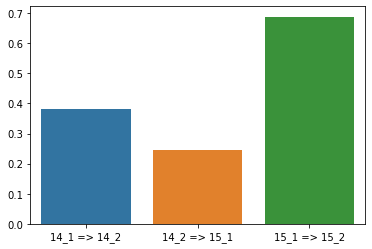

In [195]:
import seaborn as sns

loss_list = [len(total[(total['d1_p']<0)])/len(total),len(total[(total['d2_p']<0)])/len(total),len(total[(total['d3_p']<0)])/len(total)]

sns.barplot(x=['14_1 => 14_2','14_2 => 15_1','15_1 => 15_2'],y=loss_list)

In [186]:
total.loc[[18648]]

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p,mean
고객번호,,,,,,,,,,,
18648,0.000286,0.0,0.000056,0.000165,-0.000286,0.000056,0.000109,-100.0,inf,192.459516,12.197226


반기별 정규화?



In [145]:
total.loc[[14323]]

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p,sum,mean
고객번호,,,,,,,,,,,,
14323,432075628.0,2041183.0,4845651.0,2873289.0,-430034445.0,2804468.0,-1972362.0,-0.995276,1.373942,-0.407038,-0.028371,-0.009457


In [159]:
total['d1_p'].sort_values(ascending=False)[:15]

고객번호
17159    702.378000
13805    517.268411
19285    441.777323
15302    361.105170
16769    301.109503
8892     297.302692
6118     221.358125
12823    175.209647
16716    167.571467
18291    153.244000
17692    133.657813
14018    109.889474
14599    106.407068
14860     95.103995
16496     87.524525
Name: d1_p, dtype: float64

<AxesSubplot:>

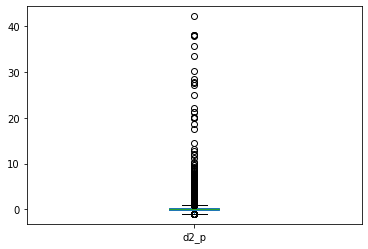

In [101]:
total['d2_p'].plot(kind='box')

In [81]:
np.std([0.01,1, 0.03])

0.462048578494609

In [94]:
np.std(total['d1_p'])

8.941435249047908

In [155]:
이상치인 친구들 을 빼는거는 xxx
따로 매출 변화 흐름을 확인할것임


SyntaxError: invalid syntax (<ipython-input-155-534ec7142346>, line 1)